### GA analysis 1
Nb to analytze the GA results

In [70]:
using PyCall
using DataFrames
using Statistics
using Seaborn

rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"
#rootdir = "/home/stephane/alma/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf


import Random
import JLD

np= pyimport("numpy")

## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [71]:
filename= "test_.jld"
dat= JLD.load(filename)
niter= length(dat["gass"])
popsize= size(dat["gass"][1].score)[1]

println(dat["evol"][1].fitness)

KeyError: KeyError: key "evol" not found

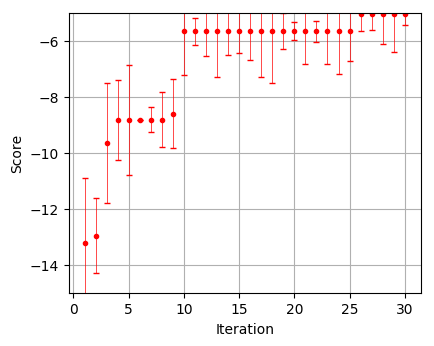

In [72]:
sc= zeros(niter)
time= zeros(niter)
sc_err= zeros(niter)

for i in 1:niter
    time[i]= i
    sc[i]= mean(dat["gass"][i].score[1])
    sc_err[i]= std(dat["gass"][i].score)
end


fig = figure(figsize=(10,8))

ax = subplot(221)
grid("on") 
plot(time, sc, ".r", markersize = 1)
errorbar(time, sc  ,yerr=  sc_err ./ 2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax.set_ylim([-15.0, -5.0])
xlabel("Iteration")
ylabel("Score")

show()